<a href="https://colab.research.google.com/github/setyo-dwi-pratama/data-analyst/blob/master/project%203%20used%20car%20data/used_car_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOBIL BEKAS DI INDIA**




Dataset merupakan data mobil bekas yang terdapat di india yang terdiri 6019 baris dan 12 kolom. Kolom yang terdapat pada dataset meliputi:

* Name : Nama merek dan model mobil

* Location : Lokasi mobil dijual

* Year : Tahun edisi mobil

* Kilometers_Driven : Total jarak pemakaian mobil oleh pengguna sebelumnya dalam satuan kilometer

* Fuel_Type : Tipe bahan bakar yang digunakan mobil (Petrol/Diesel/Electric/CNG/LPG)

* Transmission : Tipe transmisi yang digunakan mobil (Automatic/Manual)

* Owner_Type : Jenis kepemilikan mobil (First/Second/Third/Fourth & Above)

* Mileage : Tingkat konsumsi bahan bakar dalam satuan kmpl atau km/kg

* Engine : Kapasitas mesin mobil dalam satuan CC

* Power : Tenaga maksimum dari mesin mobil dalam satuan bph

* Seats : Jumlah kursi pada mobil

* Price : Harga mobil bekas dalam satuan INR Lakhs (Indian Rupee)



Soal:
1. Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek
tersebut?
2. Kota apa yang memiliki mobil bekas paling banyak?
3. Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?
4. Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer?
5. Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah
atau tinggi? Sertakan argumen yang mendukung jawaban.
6. Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang
mendukung jawaban.
7. Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan
argumen yang mendukung jawaban.
8. Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?
9. Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?
10. Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan
argumen yang mendukung jawaban.

Selain dari 10 soal di atas, kalian dianjurkan untuk membuat analisis-analisis tambahan
mengenai dataset tersebut untuk mendapatkan insight yang lebih banyak.

# **Packages:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Input Data:**

In [3]:
cars = pd.read_csv('https://raw.githubusercontent.com/setyo-dwi-pratama/data-analyst/master/project%203%20used%20car%20data/used_car_data.csv')

In [4]:
cars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [ ]:
cars.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

# Normalisasi Kolom Mileage:

In [ ]:
cars['Mileage']

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6019, dtype: object

In [ ]:
cars['Mileage'].isnull().sum()

2

In [ ]:
cars['Mileage']=cars['Mileage'].str.replace('kmpl','') #menghapus karakter kmpl
cars['Mileage']=cars['Mileage'].str.replace('km/kg','') #menghapus karakter km/kg

In [ ]:
cars[cars['Mileage'].isnull()] #melihat missing value pada kolom Mileage

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [ ]:
cars['Mileage'].replace(np.nan, '0', inplace=True) #mengganti missing value pada kolom Mileage dengan string 0

In [ ]:
cars['Mileage']=cars['Mileage'].astype(float) #mengkonversi kolom Mileage dalam float

In [ ]:
cars.loc[cars['Mileage']==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179 CC,115 bhp,5.0,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950 CC,194 bhp,5.0,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086 CC,null bhp,5.0,1.30
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498 CC,99 bhp,NaN,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446 CC,null bhp,8.0,2.20
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950 CC,194 bhp,5.0,35.00
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112 CC,null bhp,6.0,1.70
5972,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,Manual,Second,0.0,1086 CC,62 bhp,5.0,1.39


In [ ]:
cars['Mileage'].describe()

count    6019.000000
mean       18.128935
std         4.593436
min         0.000000
25%        15.160000
50%        18.150000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

# Normalisasi Kolom Engine:

In [ ]:
cars['Engine']

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
6014    1248 CC
6015    1120 CC
6016    2498 CC
6017     998 CC
6018     936 CC
Name: Engine, Length: 6019, dtype: object

In [ ]:
cars['Engine'].isnull().sum()

36

In [ ]:
cars['Engine']=cars['Engine'].str.replace('CC','') #menghapus karakter CC

In [ ]:
cars[cars['Engine'].isnull()] #melihat missing value pada kolom Engine

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,1.93


In [ ]:
cars['Engine'].replace(np.nan, '0', inplace=True) #mengganti missing value pada kolom Engine dengan string 0

In [ ]:
cars['Engine']=cars['Engine'].astype(float) #mengkonversi kolom Engine dalam float

In [ ]:
cars.loc[cars['Engine']==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,0.0,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,0.0,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,0.0,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,0.0,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,0.0,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,0.0,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,0.0,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,0.0,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,0.0,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,0.0,NaN,NaN,1.93


In [ ]:
cars['Engine'].describe()

count    6019.000000
mean     1611.579498
std       612.449869
min         0.000000
25%      1197.000000
50%      1493.000000
75%      1969.000000
max      5998.000000
Name: Engine, dtype: float64

# Normalisasi Kolom Power:

In [ ]:
cars['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object

In [ ]:
cars['Power'].isnull().sum()

36

In [ ]:
cars['Power']=cars['Power'].str.replace('bhp','') #menghapus karakter bhp
cars['Power']=cars['Power'].str.replace('null','0') #mengganti karakter null dengan string 0

In [ ]:
cars[cars['Power'].isnull()] #melihat missing value pada kolom Power

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,0.0,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,0.0,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,0.0,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,0.0,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,0.0,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,0.0,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,0.0,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,0.0,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,0.0,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,0.0,NaN,NaN,1.93


In [ ]:
cars['Power'].replace(np.nan, '0', inplace=True) #mengganti missing vlaue pada kolom Power dengan string 0

In [ ]:
cars['Power']=cars['Power'].astype(float) #mengkonversi kolom Power dalam float

In [ ]:
cars.loc[cars['Power']==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,0.0,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,0.0,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,0.0,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,0.0,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,0.0,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,0.0,5.0,1.20
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,0.0,NaN,1.75
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,0.0,5.0,2.85
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.00,2112.0,0.0,6.0,1.70


In [ ]:
cars['Power'].describe()

count    6019.000000
mean      110.562372
std        55.956041
min         0.000000
25%        74.000000
50%        91.100000
75%       138.030000
max       560.000000
Name: Power, dtype: float64

# Normalisasi Kolom Seats:

In [ ]:
cars['Seats']

0       5.0
1       5.0
2       5.0
3       7.0
4       5.0
       ... 
6014    5.0
6015    5.0
6016    8.0
6017    5.0
6018    5.0
Name: Seats, Length: 6019, dtype: float64

In [ ]:
cars['Seats'].isnull().sum()

42

In [ ]:
cars[cars['Seats'].isnull()] #melihat missing value pada kolom Seats

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,0.0,0.0,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,0.0,0.0,NaN,2.11
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,3.60
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,0.0,0.0,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,0.0,0.0,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,0.0,0.0,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,0.0,0.0,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,0.0,0.0,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,0.0,0.0,NaN,40.88
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,1.70


In [ ]:
cars['Seats'].replace(np.nan, '0', inplace=True) #mengganti missing value pada kolom Seats dengan string 0

In [ ]:
cars['Seats']=cars['Seats'].astype(float) #mengkonversi kolom Seats dalam float

In [ ]:
cars[cars['Seats']==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,0.0,0.0,0.0,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,0.0,0.0,0.0,2.11
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,0.0,3.60
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,0.0,0.0,0.0,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,0.0,0.0,0.0,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,0.0,0.0,0.0,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,0.0,0.0,0.0,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,0.0,0.0,0.0,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,0.0,0.0,0.0,40.88
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,0.0,1.70


In [ ]:
cars['Seats'].describe()

count    6019.000000
mean        5.241901
std         0.918025
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

# Bagian Normalisasi:


1. Kolom Mileage
    * Menghapus Karakter kmpl dan km/kg
    * Mengganti missing value dengan string 0
    * Mengkonversi string 0 dan semua data ke dalam type data float

2. Kolom Engine
    * Menghapus Karakter CC
    * Mengganti missing value dengan string 0
    * Mengkonversi string 0 dan semua data ke dalam type data float

3. Kolom Power
    * Menghapus Karakter bhp
    * Mengganti karakter null dengan string 0
    * Mengkonversi string 0 dan semua data ke dalam type data float

4. Kolom Seats
    * Mengganti Missing value dengan string 0
    * Mengkonversi string 0 ke dalam type data float


# Mengganti Nilai 0

Setelah semua dinormalisasi dan missing value dirubah ke nilai 0. Selanjutnya, semua kolom Mileage, Engine, Power dan Seats diganti dengan nilai rata-rata, kecuali pada kolom Seats kita ganti dengan median

In [ ]:
cars.loc[cars['Mileage']==0,'Mileage']=np.NaN
cars.loc[cars['Engine']==0,'Engine']=np.NaN
cars.loc[cars['Power']==0,'Power']=np.NaN
cars.loc[cars['Seats']==0,'Seats']=np.NaN


cars['Mileage']=cars['Mileage'].fillna(cars['Mileage'].mean())
cars['Engine']=cars['Engine'].fillna(cars['Engine'].mean())
cars['Power']=cars['Power'].fillna(cars['Power'].mean())
cars['Seats']=cars['Seats'].fillna(cars['Seats'].median())

# Penyelesaian Soal:

## Nomor 1

1. Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek tersebut?

In [ ]:
a = cars['Name'].value_counts()

In [ ]:
nomor1 = pd.DataFrame(a)

In [ ]:
nomor1.reset_index(inplace=True)

In [ ]:
nomor1.rename(columns={"index": "nama_merek_mobil", "Name": "Jumlah"}, inplace=True)

In [ ]:
nomor1

,nama_merek_mobil,Jumlah
0,Mahindra XUV500 W8 2WD,49
1,Maruti Swift VDI,45
2,Maruti Swift Dzire VDI,34
3,Honda City 1.5 S MT,34
4,Maruti Swift VDI BSIV,31
...,...,...
1871,Maruti Wagon R VXI AMT1.2,1
1872,Tata Sumo Delux,1
1873,Hyundai Verna CRDi 1.6 AT SX Option,1
1874,Skoda Rapid 1.5 TDI AT Elegance Plus,1


## Nomor 2
2. Kota apa yang memiliki mobil bekas paling banyak?

In [ ]:
cars['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

## Nomor 3

3. Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?

In [ ]:
cars['Year'].value_counts()

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64

## Nomor 4

4. Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer?

In [ ]:
cars[cars['Kilometers_Driven']<100000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Honda Amaze VX i-DTEC,Coimbatore,2015,70602,Diesel,Manual,First,25.80,1498.0,98.60,5.0,4.83
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [ ]:
nomor4 = cars[cars['Kilometers_Driven']<100000]

In [ ]:
nomor4['Name'].value_counts()

Mahindra XUV500 W8 2WD             44
Maruti Swift VDI                   41
Maruti Swift Dzire VDI             32
Honda City 1.5 S MT                31
Hyundai i10 Sportz                 30
                                   ..
Skoda Laura L n K 1.9 PD AT         1
Datsun Redi GO Sport                1
Honda CR-V 2.0 AT                   1
Renault KWID 1.0 RXL                1
Toyota Innova 2.5 GX 7 STR BSIV     1
Name: Name, Length: 1761, dtype: int64

## Nomor 5

5. Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah atau tinggi? Sertakan argumen yang mendukung jawaban.

In [ ]:
cars['Kilometers_Driven']

0        72000
1        41000
2        46000
3        87000
4        40670
         ...  
6014     27365
6015    100000
6016     55000
6017     46000
6018     47000
Name: Kilometers_Driven, Length: 6019, dtype: int64

In [ ]:
cars['Kilometers_Driven'].max()

6500000

In [ ]:
cars['Kilometers_Driven'].min()

171

In [ ]:
cars[cars['Kilometers_Driven']==171]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1361,Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,24.7,796.0,47.3,5.0,3.6


In [ ]:
cars[cars['Kilometers_Driven']==6500000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0


In [ ]:
cars['Kilometers_Driven'].median()

53000.0

In [ ]:
cars['Kilometers_Driven'].mean()

58738.38029573019

In [ ]:
cars[cars['Kilometers_Driven']>=6000000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0


In [ ]:
cars[cars['Kilometers_Driven']>=500000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.0,5.0,7.5
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.9,5.0,2.7
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.6,5.0,5.9
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0


In [ ]:
cars[cars['Kilometers_Driven']<=5000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
173,Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000,Petrol,Manual,First,18.900000,1197.0,81.86,5.0,6.50
477,Ford Figo 2015-2019 1.2P Titanium MT,Hyderabad,2018,3678,Petrol,Manual,First,18.160000,1196.0,86.80,5.0,6.80
601,Toyota Corolla Altis VL AT,Bangalore,2018,1331,Petrol,Automatic,First,14.280000,1798.0,138.03,5.0,20.00
787,Ford EcoSport 1.5 Ti VCT MT Titanium BE,Mumbai,2017,4018,Petrol,Manual,First,18.880000,1499.0,110.40,5.0,8.25
824,Renault KWID RXT,Jaipur,2016,4152,Petrol,Manual,First,25.170000,799.0,53.30,5.0,3.15
...,...,...,...,...,...,...,...,...,...,...,...,...
5690,Maruti Omni 5 Seater BSIV,Coimbatore,2019,4721,Petrol,Manual,First,14.000000,796.0,35.00,5.0,4.11
5829,Renault KWID RXT Optional,Mumbai,2018,1617,Petrol,Manual,First,25.170000,799.0,53.30,5.0,4.29
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,18.342252,1950.0,194.00,5.0,35.00
5941,Renault KWID RXL,Pune,2018,1000,Petrol,Manual,First,25.170000,799.0,53.30,5.0,3.40


## Nomor 6

6. Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang mendukung jawaban.

## Nomor 7

7. Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan argumen yang mendukung jawaban.

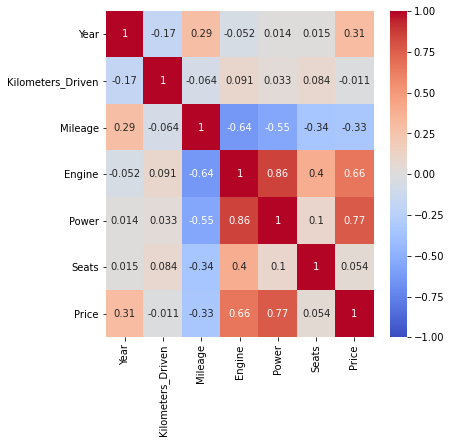

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(cars.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

berdasarkan hasil diatas, menunjukkan bahwa hubungan tahun pembuatan mobil dengan total jarak pemakaian memiliki korelasi -0.17, yang artinya tidak memiliki pengaruh satu sama lainnya

## Nomor 8

8. Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?

In [ ]:
cars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [ ]:
cars['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [ ]:
nomor8 = cars.loc[(cars['Owner_Type'] == 'Third') | (cars['Owner_Type'] == 'Fourth & Above')]

In [ ]:
nomor8

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.80,2494.0,102.00000,7.0,4.00
54,Hyundai Grand i10 Sportz,Chennai,2015,54000,Petrol,Manual,Third,18.90,1197.0,82.00000,5.0,3.60
77,Toyota Innova 2.0 G1,Chennai,2006,230000,Petrol,Manual,Third,12.40,1998.0,132.00000,8.0,4.50
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,113.25305,5.0,1.67
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.00,1086.0,113.25305,5.0,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...
5716,Maruti Zen LX,Jaipur,1998,95150,Petrol,Manual,Third,17.30,993.0,60.00000,5.0,0.53
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.00000,2.0,120.00
5942,Ford Endeavour 2.5L 4X2 MT,Jaipur,2011,119000,Diesel,Manual,Third,13.10,2499.0,141.00000,7.0,6.50
5990,Tata New Safari DICOR 2.2 VX 4x2,Pune,2008,86000,Diesel,Manual,Third,13.93,2179.0,138.00000,7.0,0.60


## Nomor 9

9. Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?

In [ ]:
cars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


## Nomor 10

10. Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan argumen yang mendukung jawaban.

In [ ]:
cars_corr = cars.copy() # Menyalin data cars (bersih) ke dalam variabel baru bernama cars_corr

In [ ]:
cars_corr

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [ ]:
cars_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [ ]:
cars_corr.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

### Merubah Kolom Location sebagai katagori:

* Ahmedabad = 1
* Bangalore = 2
* Chennai = 3
* Coimbatore = 4
* Delhi = 5
* Hyderabad = 6
* Jaipur = 7
* Kochi = 8
* Kolkata = 9
* Mumbai = 10
* Pune = 11

In [ ]:
cars_corr['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [ ]:
cars_corr['Location']=cars_corr['Location'].str.replace('Ahmedabad','1') #mengganti karakter Ahmedabad dengan string 1
cars_corr['Location']=cars_corr['Location'].str.replace('Bangalore','2') #mengganti karakter Bangalore dengan string 2
cars_corr['Location']=cars_corr['Location'].str.replace('Chennai','3') #mengganti karakter Chennai dengan string 3
cars_corr['Location']=cars_corr['Location'].str.replace('Coimbatore','4') #mengganti karakter Coimbatore dengan string 4
cars_corr['Location']=cars_corr['Location'].str.replace('Delhi','5') #mengganti karakter Delhi dengan string 5
cars_corr['Location']=cars_corr['Location'].str.replace('Hyderabad','6') #mengganti karakter Hyderabad dengan string 6
cars_corr['Location']=cars_corr['Location'].str.replace('Jaipur','7') #mengganti karakter Jaipur dengan string 7
cars_corr['Location']=cars_corr['Location'].str.replace('Kochi','8') #mengganti karakter Kochi dengan string 8
cars_corr['Location']=cars_corr['Location'].str.replace('Kolkata','9') #mengganti karakter Kolkata dengan string 9
cars_corr['Location']=cars_corr['Location'].str.replace('Mumbai','10') #mengganti karakter Mumbai dengan string 10
cars_corr['Location']=cars_corr['Location'].str.replace('Pune','11') #mengganti karakter Pune dengan string 11

In [ ]:
cars_corr['Location']=cars_corr['Location'].astype(int) #mengkonversi kolom Location dalam int

In [ ]:
cars_corr

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,10,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,11,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,3,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,5,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,7,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,7,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,9,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


### Merubah Kolom Fuel_Type sebagai katagori:

* CNG = 1
* Diesel = 2
* Electric = 3
* LPG = 4
* Petrol = 5

In [ ]:
cars_corr['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [ ]:
cars_corr['Fuel_Type']=cars_corr['Fuel_Type'].str.replace('CNG','1') #mengganti karakter CNG dengan string 1
cars_corr['Fuel_Type']=cars_corr['Fuel_Type'].str.replace('Diesel','2') #mengganti karakter Diesel dengan string 2
cars_corr['Fuel_Type']=cars_corr['Fuel_Type'].str.replace('Electric','3') #mengganti karakter Electric dengan string 3
cars_corr['Fuel_Type']=cars_corr['Fuel_Type'].str.replace('LPG','4') #mengganti karakter LPG dengan string 4
cars_corr['Fuel_Type']=cars_corr['Fuel_Type'].str.replace('Petrol','5') #mengganti karakter Petrol dengan string 5

In [ ]:
cars_corr['Fuel_Type']=cars_corr['Fuel_Type'].astype(int) #mengkonversi kolom Fuel_Type dalam int

In [ ]:
cars_corr

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,10,2010,72000,1,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,11,2015,41000,2,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,3,2011,46000,5,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,3,2012,87000,2,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,4,2013,40670,2,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,5,2014,27365,2,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,7,2015,100000,2,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,7,2012,55000,2,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,9,2013,46000,5,Manual,First,18.90,998.0,67.10,5.0,2.65


### Merubah Kolom Transmission sebagai katagori:

* Automatic = 1
* Manual = 2

In [ ]:
cars_corr['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
cars_corr['Transmission']=cars_corr['Transmission'].str.replace('Automatic','1') #mengganti karakter Automatic dengan string 1
cars_corr['Transmission']=cars_corr['Transmission'].str.replace('Manual','2') #mengganti karakter Manual dengan string 2

In [ ]:
cars_corr['Transmission']=cars_corr['Transmission'].astype(int) #mengkonversi kolom Transmission ke dalam int

In [ ]:
cars_corr

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,10,2010,72000,1,2,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,11,2015,41000,2,2,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,3,2011,46000,5,2,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,3,2012,87000,2,2,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,4,2013,40670,2,1,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,5,2014,27365,2,2,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,7,2015,100000,2,2,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,7,2012,55000,2,2,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,9,2013,46000,5,2,First,18.90,998.0,67.10,5.0,2.65


### Merubah Kolom Owner_Type sebagai katagori:

* First = 1
* Second = 2
* Third = 3
* Fourth & Above = 4

In [ ]:
cars_corr['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [ ]:
cars_corr['Owner_Type']=cars_corr['Owner_Type'].str.replace('First','1') #mengganti karakter First dengan string 1
cars_corr['Owner_Type']=cars_corr['Owner_Type'].str.replace('Second','2') #mengganti karakter Second dengan string 2
cars_corr['Owner_Type']=cars_corr['Owner_Type'].str.replace('Third','3') #mengganti karakter Third dengan string 3
cars_corr['Owner_Type']=cars_corr['Owner_Type'].str.replace('Fourth & Above','4') #mengganti karakter Fourth & Above dengan string 4

In [ ]:
cars_corr['Owner_Type']=cars_corr['Owner_Type'].astype(int) #mengkonversi kolom Owner_Type ke dalam int

In [ ]:
cars_corr

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,10,2010,72000,1,2,1,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,11,2015,41000,2,2,1,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,3,2011,46000,5,2,1,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,3,2012,87000,2,2,1,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,4,2013,40670,2,1,2,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,5,2014,27365,2,2,1,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,7,2015,100000,2,2,1,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,7,2012,55000,2,2,2,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,9,2013,46000,5,2,1,18.90,998.0,67.10,5.0,2.65


### Melihat Korelasi yang mempengaruhi harga mobil bekas di india

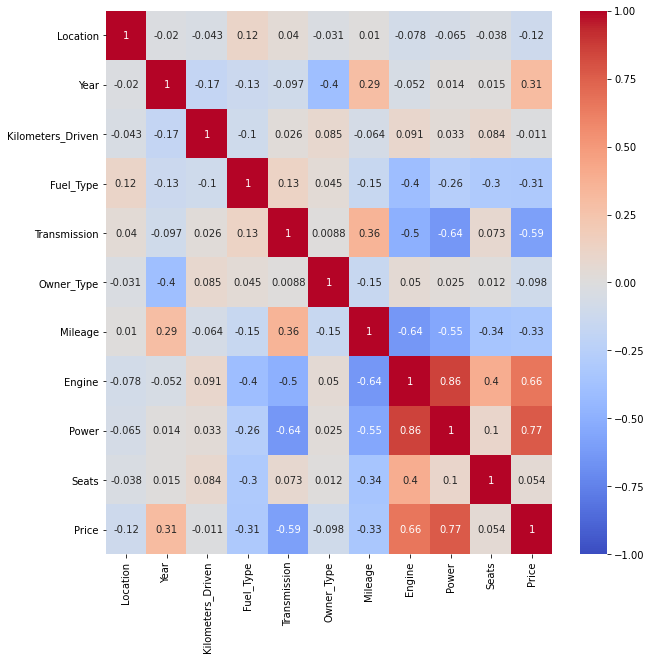

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cars_corr.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)